In [1]:
# inline plotting instead of popping out
%matplotlib inline
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
 
df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',
    sep=',')
print(df.head())
 
# Do not modify
df = df.drop(['cbwd'], axis=1)  # drop non-scalar feature
df = df.dropna(axis=0, how='any')  # drop samples who has nan feature
df.head()
 
 
# Do not modify
idx = np.logical_or(
    np.logical_and(df['year'].values == 2014, df['month'].values < 3),
    np.logical_and(df['year'].values == 2013, df['month'].values == 12))
X = df.loc[idx].drop('pm2.5', axis=1)
y = df.loc[idx]['pm2.5'].values
X.head()

   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0


,No,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir
34320,34321,2013,12,1,0,-13,-2.0,1026.0,0.89,0,0
34321,34322,2013,12,1,1,-14,-3.0,1025.0,3.13,0,0
34322,34323,2013,12,1,2,-13,-3.0,1025.0,0.89,0,0
34323,34324,2013,12,1,3,-13,-4.0,1025.0,0.89,0,0
34324,34325,2013,12,1,4,-13,-3.0,1025.0,1.78,0,0


In [2]:
X = X.drop(['Iws','Is','Ir'], axis=1) 
X.head()

,No,year,month,day,hour,DEWP,TEMP,PRES
34320,34321,2013,12,1,0,-13,-2.0,1026.0
34321,34322,2013,12,1,1,-14,-3.0,1025.0
34322,34323,2013,12,1,2,-13,-3.0,1025.0
34323,34324,2013,12,1,3,-13,-4.0,1025.0
34324,34325,2013,12,1,4,-13,-3.0,1025.0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)



[Random Forest]

MSE train: 175.47, test: 1116.75
R^2 train: 0.99, test: 0.93


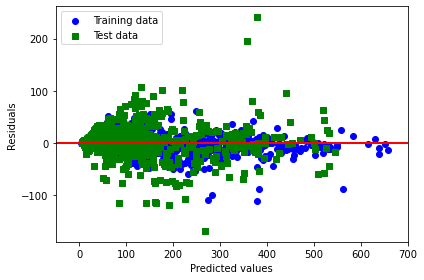

In [4]:
#Implement Random Forest
forest = RandomForestRegressor(
    n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('\n[Random Forest]\n')
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

# Residual plot
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=700, lw=2, color='red')
plt.xlim([-50,700])
plt.tight_layout()
plt.show()


[Quartic]

#Features: 495
MSE train: 2649.81, test: 3244.40
R^2 train: 0.83, test: 0.79


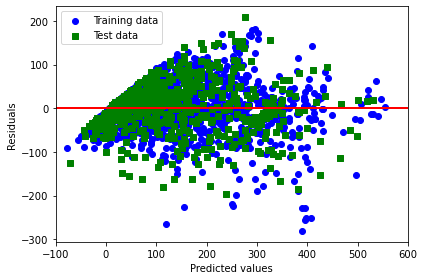

In [5]:
#Implement Linear Regression

from sklearn.linear_model import LinearRegression
regr = LinearRegression()

#Standardization before LR
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#degree=4
quartic = PolynomialFeatures(degree=4)  
print('\n[Quartic]\n')
X_quartic_train = quartic.fit_transform(X_train_std)
X_quartic_test = quartic.fit_transform(X_test_std)
print('#Features: %d' % X_quartic_train.shape[1])
regr = regr.fit(X_quartic_train, y_train)
y_train_pred = regr.predict(X_quartic_train)
y_test_pred = regr.predict(X_quartic_test)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

# Residual plot
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-100, xmax=600, lw=2, color='red')
plt.xlim([-100, 600])
plt.tight_layout()
plt.show()

